In [1]:
!pip install altair

     |████████████████████████████████| 604kB 4.6MB/s eta 0:00:01


In [2]:
from pandas import Series, DataFrame
import pandas as pd
import matplotlib as mpl
import numpy as np
import altair as alt

# Trabalho Final de Python para IA

## Exercício 1
Leia o arquivo lemonades.csv usando pandas

In [3]:
lemonades = pd.read_csv('Lemonades.csv', delimiter=';' )
lemonades.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,07/01/2016,Park,97,67,70,90.0,0.25
1,07/02/2016,Park,98,67,72,90.0,0.25
2,07/03/2016,Park,110,77,71,104.0,0.25
3,07/04/2016,Beach,134,99,76,98.0,0.25
4,07/05/2016,Beach,159,118,78,135.0,0.25


## Exercício 2
Retorne as informações sobre as colunas e as principais estatísticas
sobre o dataset.

In [4]:
lemonades.describe()

,Lemon,Orange,Temperature,Leaflets,Price
count,32.000000,32.000000,32.000000,31.000000,32.000000
mean,116.156250,80.000000,78.968750,108.548387,0.354688
std,25.823357,21.863211,4.067847,20.117718,0.113137
min,71.000000,42.000000,70.000000,68.000000,0.250000
25%,98.000000,66.750000,77.000000,90.000000,0.250000
50%,113.500000,76.500000,80.500000,108.000000,0.350000
75%,131.750000,95.000000,82.000000,124.000000,0.500000
max,176.000000,129.000000,84.000000,158.000000,0.500000


## Exercício 3
Realize a limpeza do dataset:
- a. verifique se existe valores nulos
- b. verifique e remova, se existir, linhas duplicadas
- c. trate os elementos faltantes (interpolação (data) e media)


In [5]:
lemonades.isnull().sum()

Date           1
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       1
Price          0
dtype: int64

In [6]:
lemonades.isna().sum()

Date           1
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       1
Price          0
dtype: int64

In [7]:
lemonades.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
dtype: bool

In [8]:
lemonades.drop_duplicates()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,07/01/2016,Park,97,67,70,90.0,0.25
1,07/02/2016,Park,98,67,72,90.0,0.25
2,07/03/2016,Park,110,77,71,104.0,0.25
3,07/04/2016,Beach,134,99,76,98.0,0.25
4,07/05/2016,Beach,159,118,78,135.0,0.25
5,07/06/2016,Beach,103,69,82,90.0,0.25
7,07/07/2016,Beach,143,101,81,135.0,0.25
8,NaN,Beach,123,86,82,113.0,0.25
9,07/09/2016,Beach,134,95,80,126.0,0.25
10,07/10/2016,Beach,140,98,82,131.0,0.25


In [9]:
lemonades['Leaflets'] = lemonades['Leaflets'].fillna(lemonades['Leaflets'].mean())

In [10]:
lemonades.isnull().sum()

Date           1
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       0
Price          0
dtype: int64

In [11]:
#TODO Interpolate Date

# Exercício 4
Adicione uma coluna chamada "Sales" que contém o total de
vendas de limão e laranja

In [12]:
lemonades['Sales'] = lemonades.apply(lambda x: x['Orange'] + x['Lemon'], axis=1)
lemonades.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales
0,07/01/2016,Park,97,67,70,90.0,0.25,164
1,07/02/2016,Park,98,67,72,90.0,0.25,165
2,07/03/2016,Park,110,77,71,104.0,0.25,187
3,07/04/2016,Beach,134,99,76,98.0,0.25,233
4,07/05/2016,Beach,159,118,78,135.0,0.25,277


# Exercício 5
Adicione uma coluna chamada "Revenue" que calcula o lucro
(venda*preço)

In [13]:
lemonades['Revenue'] = lemonades.apply(lambda x: x['Sales'] * x['Price'], axis=1)
lemonades.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
0,07/01/2016,Park,97,67,70,90.0,0.25,164,41.00
1,07/02/2016,Park,98,67,72,90.0,0.25,165,41.25
2,07/03/2016,Park,110,77,71,104.0,0.25,187,46.75
3,07/04/2016,Beach,134,99,76,98.0,0.25,233,58.25
4,07/05/2016,Beach,159,118,78,135.0,0.25,277,69.25


# Exercício 6
Escreva uma função que retorne o lucro total


In [14]:
def get_total_profit():
    return lemonades['Revenue'].sum()

get_total_profit()

2181.0

# Exercício 7

Escreva uma função que receba dois parâmetros, dataset e
temp(int). Se temp for 1, ele retorna a máxima temperatura
observada no conjunto de dados; se 0, retorna a média do período
observado; se -1, retorna a temperatura mínima.

In [15]:
def process_temp(dataset, temp):
    if temp == 1:
        return dataset['Temperature'].max()
    elif temp == 0:
        return dataset['Temperature'].mean()
    elif temp == -1:
        return dataset['Temperature'].min()
    else:
        raise ValueError(f"Invalid Temp:{temp}")

print(f'Max: {process_temp(lemonades, 1)}')
print(f'Mean: {process_temp(lemonades, 0)}')
print(f'Min: {process_temp(lemonades, -1)}')



Max: 84
Mean: 78.96875
Min: 70


# Exercício 8

Escreva uma função que receba dois parâmetros (dataset,
localização) e retorne o dataset com o preço do limão e laranja
ajustados em 15% se a localização for 'Park' ou ajustados em 10% se
a localização for 'Beach'.




In [20]:
def adjust_price(row, local):
    prices = {
        'Park': 0.15,
        'Beach': 0.10
    }
    if row['Location'] == local:
        return row['Price'] * (1 + prices[local])
    else:
        return row['Price']


# TODO Verificar se eh parametro ou a propria coluna
def apply_price(dataset, local):
    dataset['Price'] = dataset.apply(lambda x: adjust_price(x, local), axis=1)
    return dataset


lemonades = apply_price(lemonades, 'Beach')
lemonades = apply_price(lemonades, 'Park')
lemonades.head()
    

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
0,07/01/2016,Park,97,67,70,90.0,0.2875,164,41.00
1,07/02/2016,Park,98,67,72,90.0,0.2875,165,41.25
2,07/03/2016,Park,110,77,71,104.0,0.2875,187,46.75
3,07/04/2016,Beach,134,99,76,98.0,0.3025,233,58.25
4,07/05/2016,Beach,159,118,78,135.0,0.3025,277,69.25


# Exercício 9

Escreva uma função que receba o dataset como parâmetro e
retorne o dataset com uma coluna a mais que mostre o rank de
temperatura. O dataset retornado precisa estar ordenado de
acordo com rank (descendente)


In [23]:
def set_rank(dataset):
    dataset['Rank'] = dataset['Temperature'].rank(ascending=True)
    dataset = dataset.sort_values(by='Rank', ascending=False)
    return dataset

lemonades = set_rank(lemonades)
lemonades.head()
    


,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue,Rank
12,07/12/2016,Beach,130,95,84,99.0,0.25,225,56.25,31.5
25,7/25/2016,Park,156,113,84,135.0,0.50,269,134.50,31.5
11,07/11/2016,Beach,162,120,83,135.0,0.25,282,70.50,29.5
26,7/26/2016,Park,176,129,83,158.0,0.35,305,106.75,29.5
31,7/31/2016,Beach,76,47,82,68.0,0.35,123,43.05,24.5


# Exercício 10
Imprima um gráfico de linha que retorne o lucro ao longo do tempo

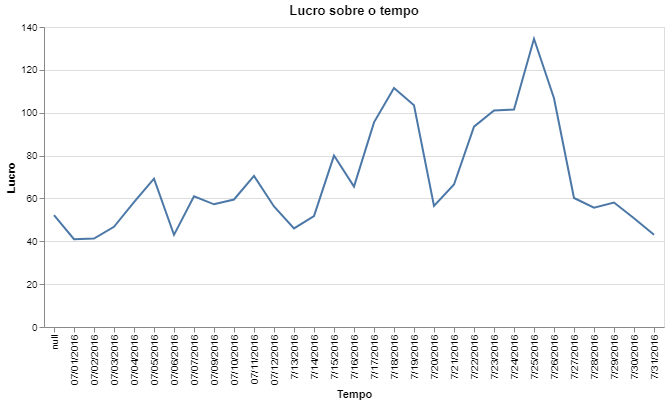

In [27]:
alt.Chart(lemonades).mark_line().encode(
    x= alt.X('Date', axis=alt.Axis(title='Tempo')),
    y= alt.Y('Revenue', axis=alt.Axis(title='Lucro'))
).properties(
    title="Lucro sobre o tempo"
)

# Exercício 11

Crie um scatter-plot leaflets x sales. Existe alguma correlação entre
os dados? (Use a correlação de Pearson e explique o significado do
valor obtido por ela)


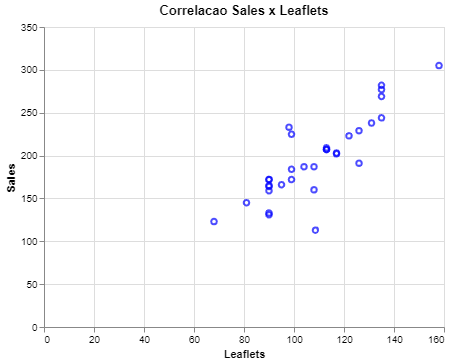

In [33]:
alt.Chart(lemonades).mark_point(
    color='blue'
).encode(
    x= alt.X('Leaflets', axis=alt.Axis(title='Leaflets')),
    y= alt.Y('Sales', axis=alt.Axis(title='Sales'))
).properties(
    title="Correlacao Sales x Leaflets"
)

# Exercício 12

Crie um histograma com 10 bins que mostre o lucro (revenue)

In [1]:
alt.Chart(lemonades).mark_bar().encode(
    x= alt.X('Revenue', axis=alt.Axis(title='Revenue'), bin=alt.Bin(maxbins=10)),
    y= 'count()'
).properties(
    title="Correlacao Sales x Leaflets"
)

NameError: name 'alt' is not defined

# Exercício 13

Crie um gráfico de linha que mostre o lucro por tipo de fruta ao
longo do tempo.

In [ ]:
alt.Chart(lemonades).mark_line().encode(
    x= alt.X('Date', axis=alt.Axis(title='Tempo')),
    y= alt.Y('Revenue', axis=alt.Axis(title='Lucro'))
    color=''
).properties(
    title="Lucro sobre o tempo"
)